In [1]:
__author__ = "@Tssp"
__date__ = "9/10/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5))/2
aursize = (5*aur, 5)

In [60]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [61]:
# Parameters and Constants:
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky = 2*np.pi/lambd
Iy = 4993 * (1e4 / Eh * to * ao**2)
Vy = alpha * Iy # a.u
Iy = Vy/alpha
wy = np.sqrt( 2 * Vy * ky**2 / mass)       
dho = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [62]:
np.sqrt(7802/4993)

1.250035048577335

In [63]:
folder_path = 'Simulations/ix7802_iy4993_iz50/config/'

In [64]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix7802_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm200_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a {len(delta_nonreaded)} folders without data, \ndelta={delta_nonreaded} non readed')

There are a 12 folders without data, 
delta=['.70735', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71195', '.71200'] non readed


In [65]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [66]:
dic = transpose_energies(Data)

In [67]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1001 -0.14367160045877198
First trap state:  1002 0.05907864941907296


In [68]:
for key in dic.keys():
    dic[key] = np.sort(dic[key])

In [70]:
fig, ax = plt.subplots(figsize=aursize)
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('Results/Figures/Ix7802_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

In [71]:
%matplotlib inline

1012
1013


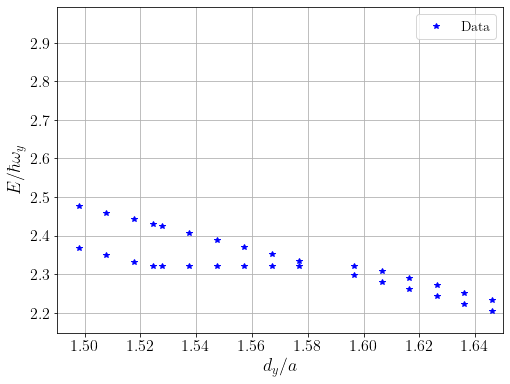

In [72]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 11, least_bound_pos + 13):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
#ax2.set_ylim(2.32, 2.326)
ax2.set_xlim(1.49, 1.65)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
plt.show()

In [73]:
%matplotlib

Using matplotlib backend: MacOSX


In [74]:
fig2, ax2 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos + 6, least_bound_pos + 13):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.32, 2.326)
ax2.set_xlim(1.13, 1.6)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 40:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [75]:
%matplotlib inline

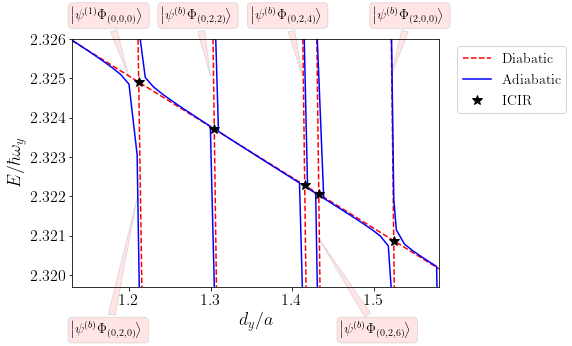

In [77]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1007:
f1007 = np.polyfit(xcoord, ycoord, deg=1)
x1007 = np.linspace(1.13, 1.60, num=40)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1007']/wy, 'b', label='Adiabatic')

# nivel 1008:
f1008 = np.polyfit(x[(x > 1.06) & (x < 1.2)], np.array(dic['nivel_1008'])[(x > 1.06) & (x < 1.2)]/wy, deg=1)
x1008 = np.linspace(1.21, 1.24, num=100)
ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1008']/wy, 'b')

# nivel 1009:
f1009 = np.polyfit(x[(x > 1.25) & (x < 1.29)], np.array(dic['nivel_1009'])[(x > 1.25) & (x < 1.29)]/wy, deg=1)
x1009 = np.linspace(1.3, 1.33, num=100)
ax3.plot(x1009, np.polyval(f1009, x1009), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x > 1.30) & (x < 1.4)], np.array(dic['nivel_1010'])[(x > 1.30) & (x < 1.4)]/wy, deg=1)
x1010 = np.linspace(1.40, 1.43, num=100)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# nivel 1011:
f1011 = np.polyfit(x[(x > 1.32) & (x < 1.42)], np.array(dic['nivel_1011'])[(x > 1.32) & (x < 1.42)]/wy, deg=1)
x1011 = np.linspace(1.41, 1.44, num=100)
ax3.plot(x1011, np.polyval(f1011, x1011), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1011']/wy, 'b')

# nivel 1012:
f1012 = np.polyfit(x[(x > 1.43) & (x < 1.52)], np.array(dic['nivel_1012'])[(x > 1.43) & (x < 1.52)]/wy, deg=1)
x1012 = np.linspace(1.5, 1.53, num=100)
ax3.plot(x1012, np.polyval(f1012, x1012), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1012']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1007, f1008), np.polyval(f1007, cross_points(f1007, f1008)), 'k*', markersize=10, label="ICIR")
ax3.plot(cross_points(f1007, f1009), np.polyval(f1007, cross_points(f1007, f1009)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1010), np.polyval(f1007, cross_points(f1007, f1010)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1011), np.polyval(f1007, cross_points(f1007, f1011)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1012), np.polyval(f1007, cross_points(f1007, f1012)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.21, 2.322), xytext=(1.13, 2.3185), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.2, 2.325), xytext=(1.13, 2.3265), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.3, 2.325), xytext=(1.24, 2.3265), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,4)}\right>$', xy=(1.413, 2.325), xytext=(1.35, 2.3265), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,6)}\right>$', xy=(1.43, 2.321), xytext=(1.46, 2.3185), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.52, 2.325), xytext=(1.50, 2.3265), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.3197, 2.326)
ax3.set_xlim(1.13, 1.58)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix7802_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [23]:
print(f'''Crosses between (x, E):
* 1007-1008: ({cross_points(f1007, f1008)}, {np.polyval(f1007, cross_points(f1007, f1008))})
* 1007-1009: ({cross_points(f1007, f1009)}, {np.polyval(f1007, cross_points(f1007, f1009))})
* 1007-1010: ({cross_points(f1007, f1010)}, {np.polyval(f1007, cross_points(f1007, f1010))})
* 1007-1011: ({cross_points(f1007, f1011)}, {np.polyval(f1007, cross_points(f1007, f1011))})
* 1007-1012: ({cross_points(f1007, f1012)}, {np.polyval(f1007, cross_points(f1007, f1012))})''')

Crosses between (x, E):
* 1007-1008: (1.2114164988027574, 2.324908637073628)
* 1007-1009: (1.3041460663262452, 2.3237126800938785)
* 1007-1010: (1.41511628370454, 2.322281468781648)
* 1007-1011: (1.4323801915228471, 2.322058811741348)
* 1007-1012: (1.524337126543412, 2.320872819600855)


In [24]:
print(f"ICIR: asc/dy = {1/cross_points(f1007, f1008)} and {1/cross_points(f1007, f1012)}")

ICIR: asc/dy = 0.8254799245249671 and 0.6560228591083396


In [25]:
print(f"asc: {0.8254799245249671*dho} and {0.6560228591083396*dho}")

asc: 1434.4125018990549 and 1139.9518785124656


In [26]:
np.savetxt('Results/ICIR_positions_7802_4993_50.txt', 
           [[1.25, 1.25], [1/cross_points(f1007, f1008), 1/cross_points(f1007, f1012)], 
            [np.polyval(f1007, cross_points(f1007, f1008)), np.polyval(f1007, cross_points(f1007, f1012))]], 
           header='wx/wy, asc/dy, E/hwy')